In [1]:
import io
from google.colab import files
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from math import isnan
import seaborn as sn
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from google.colab import drive
%matplotlib inline

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
with open('/content/drive/My Drive/MachineLearningProject/Dataset/bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv', 'r') as f:
  hist = pd.read_csv(f)

FileNotFoundError: ignored

In [ ]:
hist.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
hist.tail(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4727767,1609372260,28836.97,28849.67,28807.78,28826.52,2.051917,59173.965272,28838.376450
4727768,1609372320,28826.49,28844.25,28816.09,28816.09,0.721410,20803.457100,28837.207539
4727769,1609372380,28814.36,28822.71,28800.00,28800.00,1.529671,44076.572351,28814.411945
4727770,1609372440,28800.00,28832.79,28800.00,28831.35,2.036450,58675.679644,28812.732950
4727771,1609372500,28809.07,28825.50,28800.01,28810.08,0.087391,2517.799582,28810.597267
4727772,1609372560,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798
4727773,1609372620,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863
4727774,1609372680,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266
4727775,1609372740,28910.54,28911.52,28867.60,28881.30,7.332773,211870.912660,28893.695831
4727776,1609372800,28893.21,28928.49,28893.21,28928.49,5.757679,166449.709320,28909.166061


In [ ]:
hist_copy = hist.copy()
hist.shape

(4727777, 8)

In [ ]:
hist["Close"].max()

28997.38

In [ ]:
hist["Open"].max()

28997.38

In [ ]:
hist.drop('Timestamp', axis=1, inplace=True)

In [ ]:
hist.isnull().sum()

Open                 1243472
High                 1243472
Low                  1243472
Close                1243472
Volume_(BTC)         1243472
Volume_(Currency)    1243472
Weighted_Price       1243472
dtype: int64

In [ ]:
def replace_NaN(df):
  old_df = df.copy()
  for row_index, row in old_df.iterrows():
     column_index = 0
     for value in row:
       if isnan(value):
         df.iloc[row_index, column_index] = df.iloc[row_index-1, column_index] 
       column_index += 1

In [ ]:
def replace_NaN_with_median(data):
  data['Open'] = data['Open'].fillna(data['Open'].median())
  data['High'] = data['High'].fillna(data['High'].median())
  data['Low'] = data['Low'].fillna(data['Low'].median())
  data['Close'] = data['Close'].fillna(data['Close'].median())
  data['Volume_(BTC)'] = data['Volume_(BTC)'].fillna(data['Volume_(BTC)'].median())
  data['Volume_(Currency)'] = data['Volume_(Currency)'].fillna(data['Volume_(Currency)'].median())
  data['Weighted_Price'] = data['Weighted_Price'].fillna(data['Weighted_Price'].median())


In [ ]:
hist =  hist.dropna(axis = 0, how = 'all')

In [ ]:
hist.isnull().sum() #Should be zero

Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [ ]:
def train_test_split(array, test_size=0.2):
    split_row = len(array) - int(test_size * len(array))
    train_data = array[:split_row]
    test_data = array[split_row:]
    return train_data, test_data
    
train, test = train_test_split(hist, test_size=0.2)

In [ ]:
target_col = 'Close'
target_index = 3
hist.iloc[1:5, target_index]

478     4.39
547     4.57
548     4.58
1224    4.58
Name: Close, dtype: float64

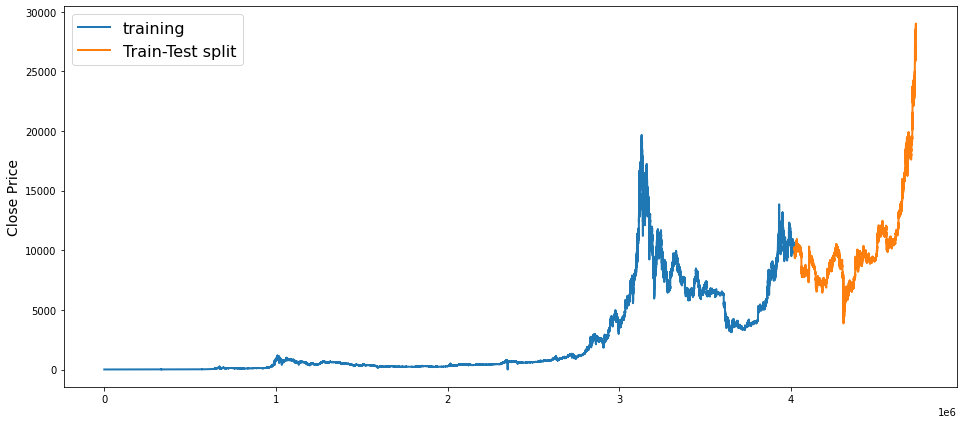

In [ ]:
def line_plot(line1, line2, label1=None, label2=None, title='Train-Test split', lw=2):
    fig, ax = plt.subplots(1, figsize=(16, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('Close Price', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)


line_plot(train[target_col], test[target_col], 'training', 'Train-Test split', title='')

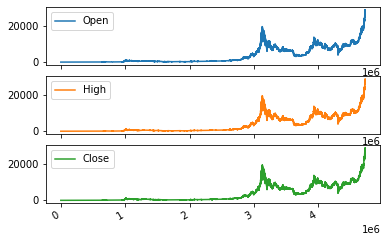

In [ ]:
plot_cols = ['Open', 'High', 'Close']
plot_features = hist[plot_cols]
_ = plot_features.plot(subplots=True)

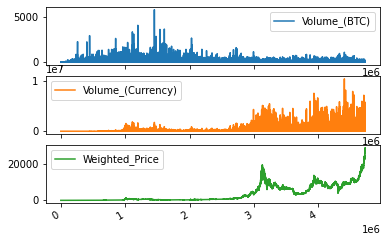

In [ ]:
plot_cols = ['Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']
plot_features = hist[plot_cols]
_ = plot_features.plot(subplots=True)

In [ ]:
#scaler = StandardScaler()
#hist_array = scaler.fit_transform(hist)
#hist = pd.DataFrame(hist_array, columns=hist_copy.columns.drop('Timestamp'))

In [ ]:
target = hist[target_col].to_numpy()
target = target.reshape(-1,1)
scaler = MinMaxScaler(feature_range = (0, 1))

scaler2 = MinMaxScaler(feature_range = (0, 1))
scaler2.fit(target)

hist_array = scaler.fit_transform(hist)
hist = pd.DataFrame(hist_array, columns=hist_copy.columns.drop('Timestamp'))

In [ ]:
target.shape

(2787444, 1)

In [ ]:
hist.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,-0.822873,-0.822712,-0.823073,-0.822875,-0.295030,-0.279961,-0.822886
1,-0.822873,-0.822712,-0.823073,-0.822875,1.118106,-0.277803,-0.822886
2,-0.822844,-0.822664,-0.823044,-0.822827,0.816789,-0.278210,-0.822849
3,-0.822823,-0.822662,-0.823023,-0.822825,-0.041069,-0.279556,-0.822835
4,-0.822823,-0.822662,-0.823023,-0.822825,-0.263928,-0.279911,-0.822835


In [ ]:
hist.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2787439,1.874649,1.872606,1.876654,1.873912,-0.295074,-0.232047,1.875144
2787440,1.875204,1.872762,1.877975,1.875231,-0.308164,-0.278537,1.875372
2787441,1.872824,1.871206,1.873483,1.871860,-0.107095,0.434942,1.872787
2787442,1.871833,1.871008,1.873266,1.870527,-0.294959,-0.231719,1.870762
2787443,1.872964,1.870771,1.872075,1.873238,-0.301502,-0.254896,1.873001


In [ ]:
hist.shape

(3484305, 7)

In [ ]:
def extract_window_data(array, window_len=60):
  X = []
  y  = []
  for i in range(window_len, len(array)):
      X.append(array[i-window_len:i])
      y.append(array[i, target_index])
  X, y = np.array(X), np.array(y)
  return X, y

In [ ]:
def prepare_data(array, target_col, window_len=60, test_size=0.2):
    #We split the dataset into train and test
    train_data, test_data = train_test_split(array, test_size=test_size)
    #We extract all the possible windows
    X_train, y_train = extract_window_data(train_data, window_len)
    #We extract all the possible windows
    X_test, y_test = extract_window_data(test_data, window_len)
   
    return X_train, y_train, X_test, y_test

In [ ]:
def build_lstm_model(window_len, num_features, output_size, neurons=50, activ_func='linear', dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, return_sequences = True, input_shape =(window_len, num_features)))
    model.add(LSTM(neurons, input_shape =(window_len, num_features)))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
    model.compile(loss=loss, optimizer=optimizer, metrics=['mse'])
    
    return model

**Parameters**

In [ ]:
np.random.seed(42)
window_len = 20
test_size = 0.2
lstm_neurons = 25
epochs = 1
num_features = len(hist.columns)
activ_func = 'linear'
batch_size = 128
loss = 'mse'
dropout = 0.2
optimizer = keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
train, test = train_test_split(hist_array, test_size=test_size)
X_train, y_train, X_test, y_test = prepare_data(hist_array, target_col, window_len=window_len, test_size=test_size)

In [ ]:
X_test.shape

(696841, 20, 7)

In [ ]:
y_train.shape

(2787424,)

In [ ]:
train.shape

(2787444, 7)

In [ ]:
test.shape

(696861, 7)

In [ ]:
model = build_lstm_model(window_len, num_features, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss, optimizer=optimizer)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 20, 25)            3300      
_________________________________________________________________
lstm_7 (LSTM)                (None, 25)                5100      
_________________________________________________________________
dropout_3 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 8,426
Trainable params: 8,426
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, batch_size = batch_size, epochs=epochs, verbose=1, shuffle=True)

21777/21777 [==============================] - 502s 23ms/step - loss: 2.4007e-04 - mse: 2.4007e-04


In [ ]:
history.history

{'loss': [0.00019662748672999442], 'mse': [0.00019662748672999442]}

In [ ]:
results = model.evaluate(X_test, y_test)
print("test loss:", results)

21777/21777 [==============================] - 96s 4ms/step - loss: 3.0715e-05 - mse: 3.0715e-05
test loss: [3.071514947805554e-05, 3.071514947805554e-05]


In [ ]:
preds = model.predict(X_test)

In [ ]:
preds.shape

(696841, 1)

In [ ]:
hist_copy.shape

(4727777, 8)

In [ ]:
hist_copy =  hist_copy.dropna(axis = 0, how = 'any')

In [ ]:
hist_copy.isnull().sum() #Should be zero

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [ ]:
hist_copy.shape

(3484305, 8)

In [ ]:
hist.shape

(3484305, 7)

In [ ]:
predicted_price = scaler2.inverse_transform(preds)
split_row = len(hist_copy) - int(0.2 * len(hist_copy))
data_test = hist_copy[split_row:]

In [ ]:
data_test = data_test[target_col]

In [ ]:
X_plot = hist_copy[split_row:]
X_plot = X_plot["Timestamp"]

In [ ]:
X_plot.shape

(696861,)

In [ ]:
data_test.shape

(696861,)

In [ ]:
predicted_price.shape

(696841, 1)

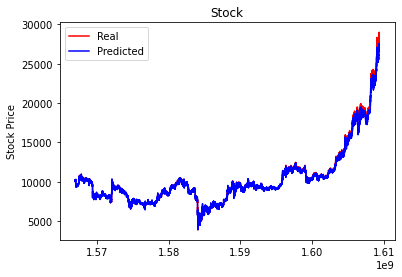

In [ ]:
# Visualizing the results
plt.plot(X_plot, data_test, color = 'red', label = 'Real')
plt.plot(X_plot[20:], predicted_price, color = 'blue', label = 'Predicted')
plt.title('Stock')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

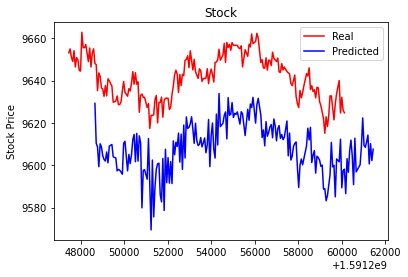

In [ ]:
# Visualizing the results
plt.plot(X_plot[400000:400200], data_test[400000:400200], color = 'red', label = 'Real')
plt.plot(X_plot[400020:400220], predicted_price[400000:400200], color = 'blue', label = 'Predicted')
plt.title('Stock')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

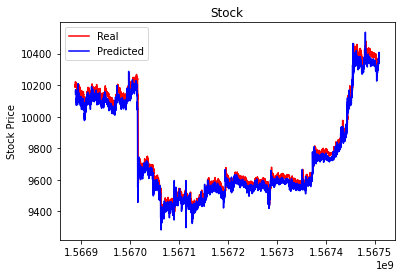

In [ ]:
# Visualizing the results
plt.plot(X_plot[0:10000], data_test[0:10000], color = 'red', label = 'Real')
plt.plot(X_plot[20:10020], predicted_price[20:10020], color = 'blue', label = 'Predicted')
plt.title('Stock')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

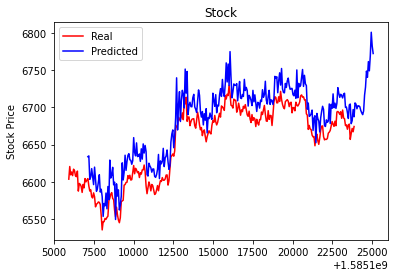

In [ ]:
# Visualizing the results
plt.plot(X_plot[300000:300300], data_test[300000:300300], color = 'red', label = 'Real')
plt.plot(X_plot[300020:300320], predicted_price[300000:300300], color = 'blue', label = 'Predicted')
plt.title('Stock')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

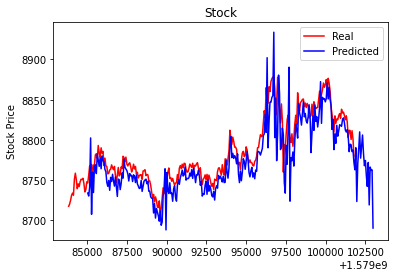

In [ ]:
# Visualizing the results
plt.plot(X_plot[200000:200300], data_test[200000:200300], color = 'red', label = 'Real')
plt.plot(X_plot[200020:200320], predicted_price[200000:200300], color = 'blue', label = 'Predicted')
plt.title('Stock')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
# Calling `save('my_model.h5')` creates a h5 file `my_model.h5`.
model.save("/content/drive/My Drive/MachineLearningProject/nn_for_bitcoin_price.h5")